APPLIED DATA SCIENCE ASSIGNMENT - 2

ALEKYA RAMANI
20BPS1097

Load the dataset.

In [1]:
import pandas as pd

# Load the dataset into a DataFrame
data = pd.read_csv('titanic.csv')

 Perform Below Visualizations.

● Univariate Analysis

● Bi - Variate Analysis

● Multi - Variate Analysis

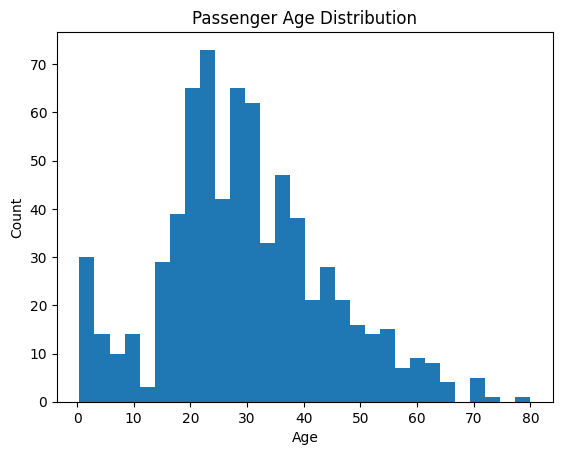

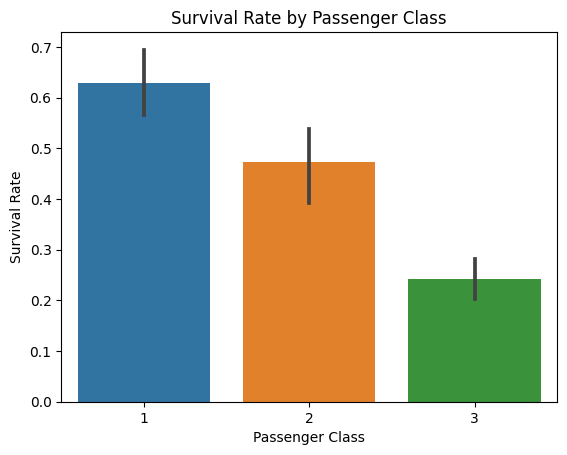

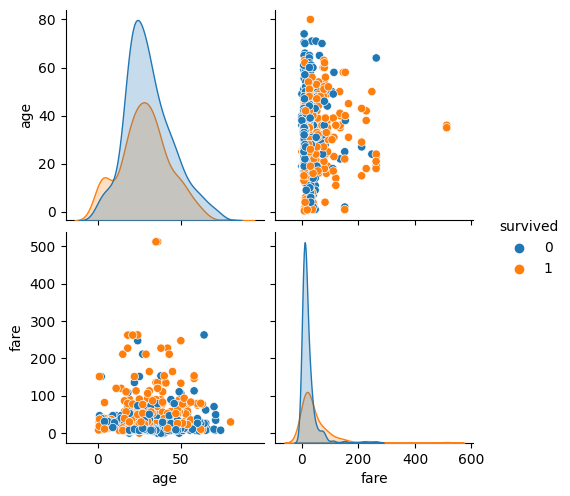

In [4]:
import matplotlib.pyplot as plt

# Example: Histogram of passenger ages
plt.hist(data['age'].dropna(), bins=30)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Passenger Age Distribution')
plt.show()

import seaborn as sns

# Example: Bar plot of survival based on passenger class
sns.barplot(x='pclass', y='survived', data=data)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class')
plt.show()

import seaborn as sns

# Example: Pairplot of age, fare, and survival
sns.pairplot(data=data, vars=['age', 'fare'], hue='survived')
plt.show()

Perform descriptive statistics on the dataset.

In [5]:
# Perform descriptive statistics
descriptive_stats = data.describe()
print(descriptive_stats)


         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


Handle the Missing values.


In [6]:
# Drop rows with missing values
data.dropna(inplace=True)

Find the outliers and replace the outliers.

In [8]:
# Find outliers using IQR method
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers
data.loc[(data['age'] < lower_bound) | (data['age'] > upper_bound), 'age'] = data['age'].median()


Check for Categorical columns and perform encoding.

In [9]:
# Check for categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Perform label encoding
data['sex'] = data['sex'].map({'female': 0, 'male': 1})


Split the data into dependent and independent variables.

In [10]:
# Split into dependent and independent variables
X = data.drop('survived', axis=1)
y = data['survived']


 Scale the independent variables.

In [14]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Specify numerical and categorical columns
numeric_cols = ['age', 'fare']
categorical_cols = ['sex', 'embarked']  # Example columns, modify based on your dataset

# Initialize the transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply preprocessing to the independent variables
X_scaled = preprocessor.fit_transform(X)


 Split the data into training and testing.

In [15]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
